Binomialkoeffizienten ausrechen:
import math
result = math.comb(5, 2)
print(result)
### 0
Berechnet die Anzahl der möglichen Kombinationen von 2 Erfolgen, die aus 5 möglichen
Versuchen gewählt werden können, ohne dass die Reihenfolge der Erfolge
berücksichtigt wird.


In [3]:
from scipy.stats import binom

In [4]:
import math
result = math.comb(5, 2)
print(result)

10


### 1. Wahrscheinlichkeit für bestimmte Trefferzahlen
#### Frage: 
Wie hoch ist die Wahrscheinlichkeit, dass Spieler A genau 6 Treffer bei 15
Würfen und gleicher Trefferquote (72%) erzielt?


In [18]:
P = lambda k,n,p: math.comb(n,k)*p**k*(1-p)**(n-k)

In [19]:
k = 6
n = 15
p_a = 0.72
a = binom.pmf(k, n, p_a)
a_1 = P(k,n,p_a)
print(f"P(X = 6) ≈ {a*100:.2f}%")
a_1

P(X = 6) ≈ 0.74%


0.007376007378430118

In [1]:
import numpy as np
import matplotlib.pyplot as plt

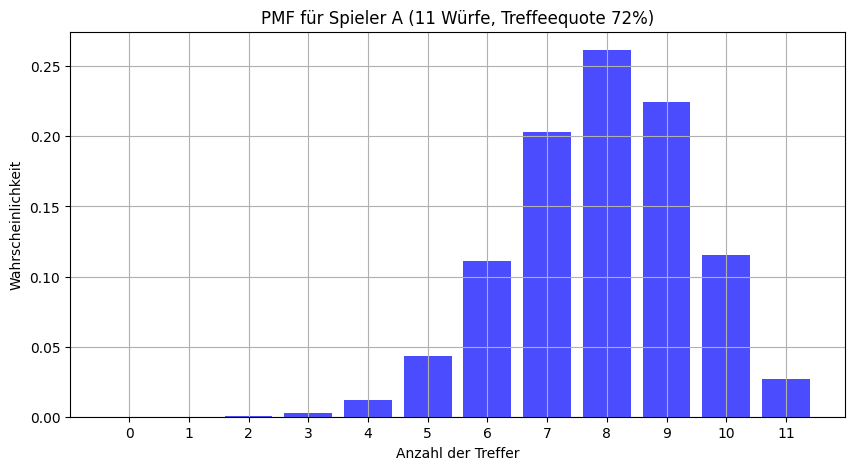

In [10]:
X = np.arange(0, 12)
pmf_a = binom.pmf(X, 11, 0.72)
plt.figure(figsize=(10,5))
plt.bar(X, pmf_a, color='b', alpha=0.7)
plt.title('PMF für Spieler A (11 Würfe, Treffeequote 72%)')
plt.xlabel('Anzahl der Treffer')
plt.ylabel('Wahrscheinlichkeit')
plt.xticks(X)
plt.grid(True);

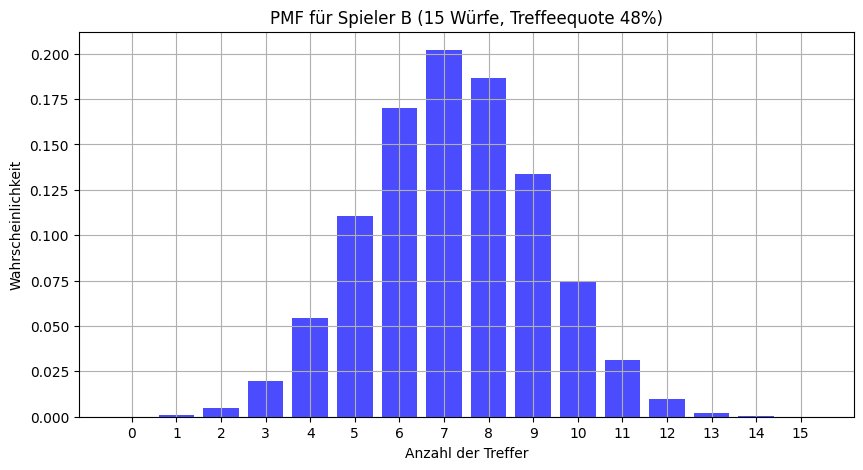

In [9]:
X = np.arange(0, 16)
pmf_a = binom.pmf(X, 15, 0.48)
plt.figure(figsize=(10,5))
plt.bar(X, pmf_a, color='b', alpha=0.7)
plt.title('PMF für Spieler B (15 Würfe, Treffeequote 48%)')
plt.xlabel('Anzahl der Treffer')
plt.ylabel('Wahrscheinlichkeit')
plt.xticks(X)
plt.grid(True);

#### Frage: 
Wie hoch ist die Wahrscheinlichkeit, dass Spieler B zwischen 5 und 7
Treffer bei 20 Würfen und gleicher Trefferquote (48%) erzielt?
(PMF benutzen und Werte addieren)


In [20]:
n_b = 20
p_b = 0.48

total_probability = 0
t_p = 0
for k in range(5,8):
    total_probability += binom.pmf(k, n_b, p_b )
    t_p += P(k,n_b, p_b)
# b_5 = binom.pmf(5, n_b, p_b )
# b_6 = binom.pmf(6, n_b, p_b )
# b_7 = binom.pmf(7, n_b, p_b )
# total_probability = b_5 + b_6 + b_7

print(f"P(5 ≤ X ≤ 7) ≈ {total_probability*100:.2f}%")
t_p

P(5 ≤ X ≤ 7) ≈ 16.43%


0.16431754624209677

#### Frage: 
Wie hoch ist die Wahrscheinlichkeit, dass Spieler A weniger als 2 Treffer bei 11 Würfen erzielt?
(PMF benutzen und Werte addieren)

In [14]:
n_a = 11
a_0 = binom.pmf(0, n_a, p_a)
a_1 = binom.pmf(1, n_a, p_a)
print(f"P(X < 2) ≈ {(a_0 + a_1)*100:.7f}%")

P(X < 2) ≈ 0.0024288%


### 2. Vergleich der Wahrscheinlichkeiten
#### Frage: 
Bei welchem Spieler ist es wahrscheinlicher, genau 7 Treffer zu erzielen: Spieler A oder Spieler B?

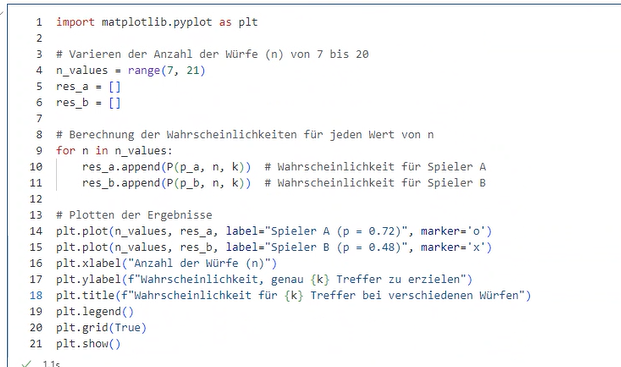

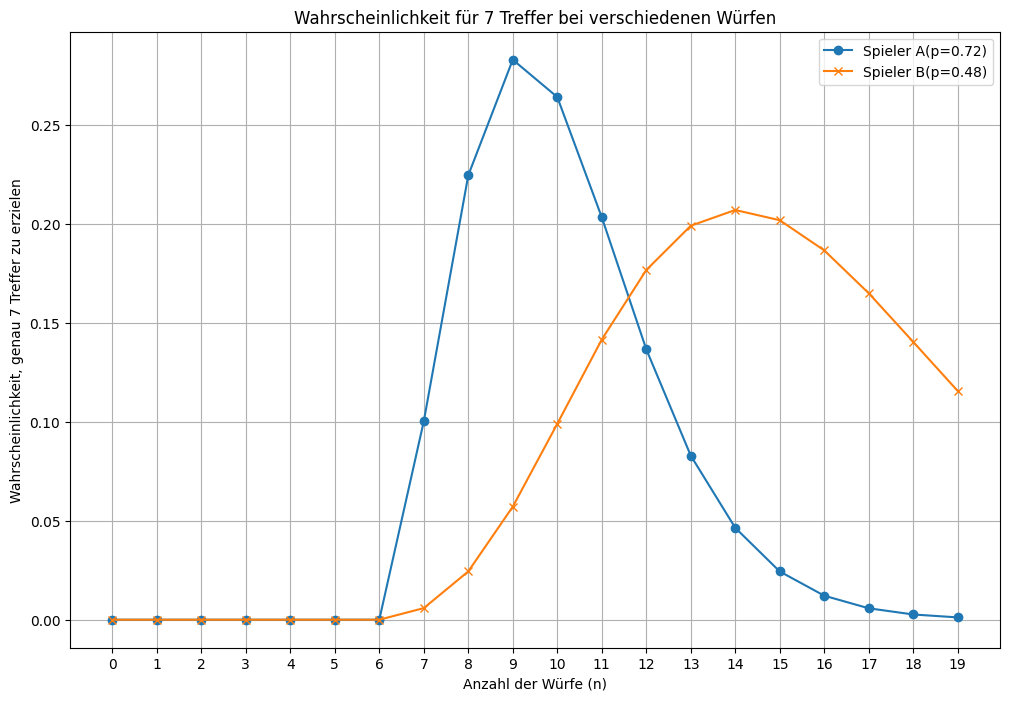

In [28]:
n_values = range(0, 20)
res_a = []
res_b = []
p_a = 0.72
p_b = 0.48
k = 7
for n in n_values:
    res_a.append(P(k, n, p_a))
    res_b.append(P(k, n, p_b))
plt.figure(figsize=(12,8))
plt.plot(n_values, res_a, label='Spieler A(p=0.72)', marker='o')

plt.plot(n_values, res_b, label='Spieler B(p=0.48)', marker='x')
plt.title(f'Wahrscheinlichkeit für {k} Treffer bei verschiedenen Würfen')
plt.xlabel('Anzahl der Würfe (n)')
plt.ylabel(f'Wahrscheinlichkeit, genau {k} Treffer zu erzielen')
plt.legend()
plt.xticks(n_values)
plt.grid(True);

In [ ]:
# Wahrscheinlichkeit für 7 Treffer bei 11 Würfen
n_a = 11
p_a = 0.72
prob_7_11 = binom.pmf(7, n_a, p_a)

# Wahrscheinlichkeit für 7 Treffer bei 15 Würfen
n_b = 15
p_b = 0.48
prob_7_15 = binom.pmf(6, n_b, p_b)

# Ergebnisse ausgeben
print(f"P(X = 6) = {prob_7_11*100:.3f}%")
print(f"P(X = 6) = {prob_7_15*100:.3f}%")

P(X = 6) = 20.346%
P(X = 6) = 17.017%


#### Frage: 
Wie verändert sich die Wahrscheinlichkeit, dass Spieler A 6 Treffer erzielt,
wenn wir die Anzahl der Würfe von 11 auf 15 bei gleicher
Trefferwahrscheinlichkeit erhöhen ?

In [15]:
# Wahrscheinlichkeit für 6 Treffer bei 11 Würfen
n_11 = 11
prob_6_11 = binom.pmf(6, n_11, p_a)

# Wahrscheinlichkeit für 6 Treffer bei 15 Würfen
n_15 = 15
prob_6_15 = binom.pmf(6, n_15, p_a)

# Ergebnisse ausgeben
print(f"P(X = 6) = {prob_6_11*100:.3f}%")
print(f"P(X = 6) = {prob_6_15*100:.3f}%")


P(X = 6) = 11.077%
P(X = 6) = 0.738%


### 3. Erwartungswert und Varianz
#### Frage: 
Was ist der Erwartungswert (Durchschnitt der Treffer) für Spieler A und B bei den gegebenen Bedingungen?

In [ ]:
n_a = 11
n_b = 15
p_a = 0.72
p_b = 0.48

erw_a  = n_a*p_a
erw_b =  n_b*p_b
print(f'expected_A: {erw_a}')  
print(f'expected_B: {erw_b:.3f}')

expected_A: 7.92
expected_B: 7.200


#### Frage: 
Wie groß ist die Varianz der Trefferzahl für Spieler A und B? Was sagt diese
Varianz über die Streuung der Ergebnisse aus?

In [32]:
n_a = 11
n_b = 15
p_a = 0.72
p_b = 0.48

var_a = n_a * p_a * (1 - p_a)
var_b = n_b * p_b * (1 - p_b)

print(f'variance_A: {var_a}, Standardabweichung: {var_a**.5:.4f}')  
print(f'variance_B: {var_b:.4f}, Standardabweichung: {var_b**.5:.4f}')


variance_A: 2.2176, Standardabweichung: 1.4892
variance_B: 3.7440, Standardabweichung: 1.9349


#### Frage:
Was bedeutet es, wenn der Erwartungswert für einen Spieler höher ist als
für den anderen?


Wenn der Erwartungswert (auch Mittelwert genannt) für einen Spieler höher ist als für den anderen, bedeutet das, dass dieser Spieler im Durchschnitt mehr Treffer erzielen wird als der andere. Der Erwartungswert gibt den Durchschnitt der erwarteten Treffer über viele Wiederholungen des gleichen Experiments an. Ein höherer Erwartungswert deutet auf eine höhere Erfolgswahrscheinlichkeit pro Wurf oder eine größere Anzahl von Würfen hin.

Im Kontext unserer Spieler bedeutet ein höherer Erwartungswert:

Der Spieler hat entweder eine höhere Trefferwahrscheinlichkeit (genauere Schüsse) oder
Der Spieler macht mehr Würfe (er hat mehr Chancen, Treffer zu erzielen).
Beispiel: Wenn Spieler A einen Erwartungswert von 8 und Spieler B einen Erwartungswert von 5 hat, würde Spieler A im Durchschnitt mehr Treffer erzielen als Spieler B, wenn beide das Experiment (z. B. eine Serie von Würfen) mehrmals wiederholen. Das sagt jedoch nichts über die Varianz (also die Schwankung um diesen Mittelwert) aus, sondern nur über den Durchschnitt der zu erwartenden Treffer.

### 4. Wahrscheinlichkeitsverteilungen für verschiedene Szenarien
#### Frage: 
Wie ändert sich die Wahrscheinlichkeit, dass Spieler A genau 6 Treffer
erzielt, wenn seine Erfolgsquote auf 80% steigt?

In [ ]:
p_a_new = 0.8
new_wahr_a = binom.pmf(6, n_a, p_a_new)

print(f"P(X = 6) = {new_wahr_a*100:.3f}%")

P(X = 6) = 3.876%


Wie ändert sich die  Wahrscheinlichkeit, dass Spieler A mindestens 7 Treffer erzielt, wenn seine Erfolgsquote auf 80%?

In [ ]:
n_a = 11
p_a = 0.8
k_a = range(7, 12)
gesamt_wahr_a = sum(P(k, n_a, p_a) for k in k_a)
gesamt_wahr_a

Wie beeinflusst eine Erhorung der Trefferwuote von Spieler B auf 60% die Wahrscheinlichkeit, dass er mindestens 9 Treffer erzielt?

In [ ]:
n_b = 15
p_b = 0.6
k_b = range(9, 16)
gesamt_wahr_b = sum(P(k, n_b, p_b) for k in k_b)

gesamt_wahr_b

0.609813155708928

#### Frage: 
Wie beeinflusst eine Erhöhung der Trefferquote von Spieler B auf 60% die
Wahrscheinlichkeit, dass er genau 6 Treffer erzielt?

In [ ]:
p_b_new = 0.6

new_wahr_b = binom.pmf(6, n_b, p_b_new)

print(f"P(X = 6) = {new_wahr_b*100:.3f}%")

P(X = 6) = 0.485%
